# Modeling Data: Linear Regression

## Motivation: Why Model Data?

Why build a model?
* **interpolation**: (find values in between points, resample your data)
* **extrapolation**: (prediction/forecast/backcast: find values outside range of points)
* **compression**: (store model parameters instead of large data table)
* **understanding**: (finding trends can reveal something deeper about the process that generates the data)

## Motivation: Why Linear Models?

## Linear Combinations

The "linear" in "linear regression" refers not so much to lines and linear functions, but rather more directly to another "linear" thing that pops up in physics (and linear algebra): "linear combinations" or "linear superpositions"

Example: position of a particle in 3 dimenions, along 3 axes:

$$\vec{x} = a_1\hat{x_1} + a_2\hat{x_2} + a_3\hat{x_3}$$

Example: velocity of a particle in 3 dimensions:

$$\vec{v} = v_x\hat{x} + v_y\hat{y} + v_z\hat{z}$$

Example: rotation in 2 dimenions as a combination of sinusoids:

$$\vec{p}(t) = (R\cos{\omega t})\hat{x} + (R\sin{\omega t})\hat{y} $$

Example: Taylor Series expansion

$$ \exp(x) = \sum_{n=0}^{\infty}{\frac{x^n}{n!}} = \frac{1}{0!}x^0 + \frac{1}{1!}x^1 + \frac{1}{2!}x^2 + \frac{1}{3!}x^3 + \dots$$

## Linear Functions

It's not just over-simplification nor just taking the easy way out. The world is filled with linear trends. 
* Physics provides a good context to explain.
* Their are two primary mental models used in the physics of motion
    * Forces
    * Energy
* There are two common ways to look at their relationship:
    * Forces applied over time change how things move and change their energy
    * Energy differences between nearby points in space result in a force on things moving between those points.
* A metaphor to help: a marble in the bottom of a "harmonic" bowl
    * the shape of the bowl may be complex, but in a small region near the bottom it can likely be modeled by a upwards turned parabola $E \sim k x^2$
    * near the bottom of the bowl the potential energy is lowest, and up on the sides, it's higher. A marble released on the side will roll down to the bottom. A marble released on the bottom does not move.
    * a marble rolling up and down the sides experiences that as a force $F \sim -kx$, linear in $x$ that increases linearly up the sides, as we move a distance $x$ away from the bottom of the bowl.
* Since any dip in an "energy surface" can be roughly approximated as a parabola, $E \sim kx^2$, and the force is related to the change in energy in space (derivative), $F \sim -\delta E \sim -kx$, the linear forces appear all over physics.
* This metaphor from physics -- of local minima in energy surfaces resulting in linear forces that drive change near those minima -- is used in many other fields like biology and economics.
* No matter how complex the reality, if you can constrain yourself to care about a small enough local neighborhood around some minima, linear models will work.

## Why Linear Regression?

Why learn and use linear regression?
* useful procedure for fitting data that appears to have a linear trend
* a good example that provides a foundation for understanding 2 subjects at the same time: 
    1. statistical modeling and 
    2. optimization problems.
    3. prelude to advanced procedures such as regularized regression and multivariant regression

## Why is is called "Linear"? Why is called "Regression"

* Linear: linear combinations of parameters
* Regression: see stories about Sir Francis Galton

https://en.wikipedia.org/wiki/Regression_toward_the_mean#History

> The concept of regression comes from genetics and was popularized by Sir Francis Galton during the late 19th century with the publication of Regression towards mediocrity in hereditary stature.[9] Galton observed that extreme characteristics (e.g., height) in parents are not passed on completely to their offspring. Rather, the characteristics in the offspring regress towards a mediocre point (a point which has since been identified as the mean). By measuring the heights of hundreds of people, he was able to quantify regression to the mean, and estimate the size of the effect. 

# Example Data

* Let's start with a code example of least squares fit
* Would be nice to pick a real data set, but the randomly generated set works well for explaining the estimation part of linear regression.

In [1]:
import random
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_data(num_pts=101, a0=-4, a1=2, mu=0, sigma=1):
    x = numpy.linspace(0,10,num_pts)
    e = numpy.array([random.gauss(mu,sigma) for n in range(num_pts)])
    y = a0 + (a1*x) + e
    return x,y

In [3]:
def plot_data(X_data, Y_data):
    fig, axis = plt.subplots(figsize=(16,4))
    axis.plot(X_data, Y_data,  label="data",  color="black", linestyle="",  marker="o")
    axis.set_ylabel("Y Data")
    axis.set_xlabel("X Data")
    axis.grid("on")
    return fig, axis

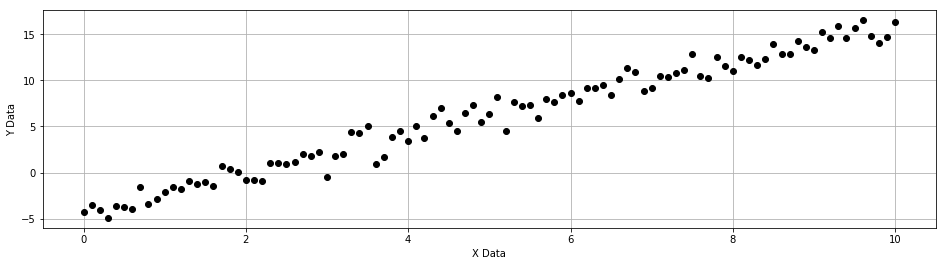

In [4]:
x, y = load_data()
plot_data(x, y,);

## Reminder: Variance, Covariance, and Correlation

Recap/Review of discussion from previous course on statistics (quantitative EDA) the three summary statistics as a way to ease into least squares.
* variance    = Independent variability of 1 thing
* covariance  = Comparison of the variability of 2 things due to the codependence
* correlation = Comparison of the variability due to the codependence, scaled by the product of the independenet variability of the 2 things separately


$$Cov(x,y) = \frac{\sum_{n=1}^{N} (x_{n} - \bar{X})(y_{n} - \bar{Y})}{(N-1)}$$

$$Var(x) = \frac{\sum_{n=1}^{N} (x_{n} - \bar{X})^2}{(N-1)}$$

## Are $x$ and $y$ Related?

* Before we fit the data using a least squares constraint, we can use the techniques from 
quantitative EDA to check whether the variables $x$ and $y$ are correlated.

## Correlation with Numpy

In [5]:
# Covariance
numpy.cov(x, y)

array([[  8.585     ,  17.41401435],
       [ 17.41401435,  36.26236288]])

In [6]:
# Correlation
numpy.corrcoef(x, y)

array([[ 1.        ,  0.98696261],
       [ 0.98696261,  1.        ]])

In [7]:
numpy.corrcoef(x, y)[0, 1]

0.9869626059379546

## Correlation with Pandas

In [8]:
import pandas as pd
df = pd.DataFrame()
df['x'] = x
df['y'] = y
df.head()

,x,y
0,0.0,-4.247265
1,0.1,-3.536852
2,0.2,-4.009153
3,0.3,-4.906623
4,0.4,-3.622344


In [9]:
df.corr()

,x,y
x,1.000000,0.986963
y,0.986963,1.000000


## Correlation with Scipy

In [10]:
from scipy.stats.stats import pearsonr

In [11]:
pearson_r, p_value = pearsonr(x,y)
print(pearson_r, p_value)

0.986962605938 2.34933462509e-80


# Example Model

The analytic solution to least squares is know, and covered later in this notebook. Here we apply it to fit a line to our data. This procedure is very commonly taught in undergraduate and courses in science and used frequently throughout observational and experimental science.

In [12]:
def model(x,y):
    X_bar = numpy.sum(x)/len(x)
    Y_bar = numpy.sum(y)/len(y)
    m = numpy.sum( (x - X_bar)*(y - Y_bar) )/numpy.sum( (x - X_bar)**2 )
    b = Y_bar - (m*X_bar)
    return m, b

In [13]:
def plot_data_model(X_data, Y_data, Y_model):
    fig, axis = plt.subplots(figsize=(16,4))
    axis.plot(X_data, Y_data,  label="data",  color="black", linestyle="",  marker="o")
    axis.plot(X_data, Y_model, label="model", color="red",   linestyle="-", marker="")
    axis.legend()
    axis.grid("on")
    return fig, axis

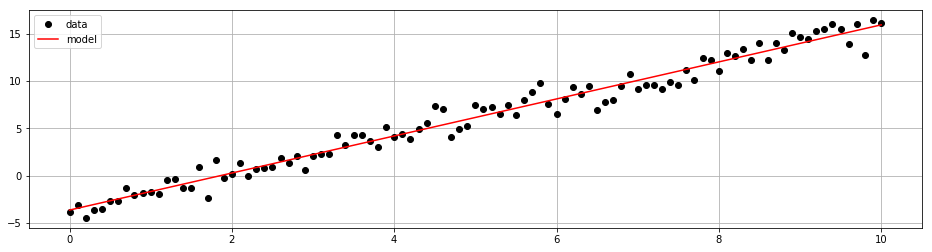

In [14]:
x, y = load_data()
m, b = model(x, y)
f = m*x + b
plot_data_model(x, y, f);

# Confusion: Linear Regression versus Least Squares

These two terms are often confounded or confused, treated as if they are both alternate terms for simply "fitting a line to some data". We need to directly address common confusion over these names and what they label.

* In the physical sciences, fitting a linear line to data that appears to have a linear trend is usually called "least squares". 
* In social sciences and statistics, what appeasr to be the same procedure is usually called 'linear regression". 
* Ultimately, the two phrases do NOT mean precisely the same thing. 
* Although they are often used interchangeably, they are two different things that happen to be tightly coupled as they are very very often used together. 

Herein we'll touch a little on how they are connected and also try to "deconfound" or "disambiguate" the two.

To do this, it is extremely helpful to start with a discussion of the mechanics of how to do modeling with least-squares, including how some of the math works. 
* Doing so is useful because it is the simplest example of a linear modeling technique that has an analytic solution.
* That solution provides a nice framework to build up some of the concepts that are helpful for the more complex models where an analytic solution is not possible. 
* More complex models can almost always only be solved computationally
* Developing the concepts and some intuition is easier if we start with a simple example where the math works out cleanly.

## What is Linear Regression?

* Linear Regression is method of modeling
* Using models that are **linear** in the parameters
* In linear regression, the model may have the unsolved form of $y = a_0x^0 + a_1x^1 + a_2x^2 + a_3x^3$, and the solved form of $y = 0.5 + 1.7x + 0.003x^2 + 0.0000009x^3$
* one view: the $a_n$ are the coefficients of the features $x_n$
* another view: the $a_n$ are parameters and $x_n$ are "dimensions"
* $y$ then can be seen as a **linear combination** of the "features" or "dimensions". Remember linear algebra?
* The trick is to find the parameters $a_n$ while only allowing linear **powers** of $a_n$, not $a_n^2$ or worse!
* Linear regression is linear in the **parameters** $a_0$, $a_1$, $a_2$, etc, but need not be limited to linear relationships between the **variables** $x$ and $y$
* more reading: https://en.wikipedia.org/wiki/Linear_model#Linear_regression_models

## What is Least Squares?

* Least Squares is one of many ways to estimate specific values for the parameters in a Linear Regression model.
* Least Squares is what is often used to find the values for $a_0, a_1, a_2, ...$ in a linear regression model.
* Least Squares applies a specific "loss function" to constrain the values for the model parameters
* The most common use case for Least Squares is in the context of a Linear Regression where the parameters beyond $a_0$ and $a_1$ are assumed to be very small, because you suspect there is a linear relationship between $x$ and $y$


# Least Squares: Think Minimization

The "least" in "least squares" tells us this is a ***minimization*** or "optimization" game: the "squares" in "least squares" hints at the form of the "loss function" that we're trying to nudge towards it's "least" possible value.
* The thing we want to minimize is some measure of error in how well the model mimics the data.
* The best case scenario would be all the data points lie on the model line and so the distance from each point to the line is ZERO. So the sum of all those "errors" is also zero.
* The larger the sum of the distances, the worse the model.
* Large errors in the positive and negative directions should NOT cancel each other out.
* So the measure of error selected for the model fit is the sum of the square of the vertical distances.
* Minimizing this measure of error gives the parameter values that when plugged into the general model equation define a single model.

Given some measured data in a table $(x,y)$, we'd like "fit" the data with a model. We start by deciding that we'll try to fit some form or linear model to our data. A linear model that has the form:

$$f(x,a_0,a_1) = a_0 + a_1x$$

But this doesn't define a single model. It defines an entire family of models. To get a specific model, we have to chose "optimal" values for $a_0$ and $a_1$. How do we select the "optimal" values for $(a_0, a_1)$? Well, not every value will result in a good "fit" to the data. We have to find a way to pick the values of $a_0$ and $a_1$ that result in the "best" fit, as determining by some measure.

The goal is to come up with a method for selecting the "optimal" values of $a_0, a_1$, so that for example:

$$a_0 = 1$$

$$a_1 = 2$$

$$f(x) = 1 + 2x$$

So in order to "optimize" or model $f(a_0, a_1)$ to fit a given data set, we need to define what we mean by "optimal". What is the measure of "optimal"? Usually this is stated as minimizing of something called a "loss function", which is just some measure of "error" in the model. Error is though of as the difference between the model and the data, for every comparison of the model $f(a_0, a_1, x_n)$ to a data point $y_n(x_n)$ for all points, $n = 0,1,...,N$.

Least-squares fitting is called "least-squares" because the "optimal" fit $f(a_0,a_1)$ is ***defined*** as the one that yields the smallest possible value for the "sum of the squares". Which squares? In this case, the "loss function" $L$ is just chosen to be the sum of the squares of the vertical distance $\Delta y$ between the data $y$ and the model $f(x,a_0,a_1)$: 

$$L = \sum_n (\Delta y_n)^2$$

$$\Delta y_n = y_n - f(x_n)$$

In statistics, a "residual" is the difference between an observed value and a predicted value:

$$r_n = \Delta y_n$$

So then the loss $L$ is 

$$L = \sum r_n^2 = \sum_n (y_n - f(x_n))^2$$

So the goal is to minimize the sum of the squared residuals. The term "residual sum of squares" or "RSS" is often used.

The sum of the squares of residuals, "residual sum of squares (RSS)", is...

> a measure of the discrepancy between the data and an estimation model; Ordinary least squares (OLS) is a method for estimating the unknown parameters in a linear regression model, with the goal of minimizing the differences between the observed responses in some arbitrary dataset and the responses predicted by the linear approximation of the data. -- https://en.wikipedia.org/wiki/Residual_sum_of_squares

> So RSS is a measure of how good the model approximates the data while OLS is a method of constructing a good model.

Why not just use $\Delta y_n$ instead of $(\Delta y_n)^2$ for the measure of error? For our overall error measure to make any sense, large height differences should not cancel out if one $\Delta y_n$ is positive and one is negative.

Notice that since the model is a function of $a_0$ and $a_1$, then so is the error, and then so is the sum $S$:

$$\Delta y_n = y_n - f(a_0, a_1, x_n)$$

$$L(a_0, a_1) = \sum [\Delta y_n(a_0, a_1)]^2 = \sum_n^N [y_n - (a_0 + a_1x_n)]^2$$

So the game is to find the specific values of $a_0, a_1$ that give the smallest possible value of $L(a_0, a_1)$ when compared to any other values input for $a_0, a_1$. If you remember calculus, a common way to find the minimum value of a function was to take a derivative, set it to zero $\delta L = 0$, and solve for a parameter value. You can take derivatives of $L(a_o, a_1)$ with respect to $a_0$ and $a_1$, and set those derivatives to zero, $\delta L/\delta a_0 = 0$ and $\delta L/\delta a_1 = 0$, and use a bit of algebra to find the analytic solution for $a_0$ and $a_1$.

$$a_1 = \frac{  \sum_{n=1}^{N} (x_{n} - \bar{X})(y_{n} - \bar{Y})  }{ \sum_{n=1}^{N} (x_{n} - \bar{X})^2  } $$

$$a_0 = \bar{Y} - a_1 \bar{X}$$

where $\bar{X}$ is the mean value of $x$: $$\bar{X} = \frac{\sum_{n=1}^{N}x_{n}}{N}$$

Notice the $a_1$ is the covariance of x and y normalized by the variance of x.

$$Cov(x,y) = \frac{\sum_{n=1}^{N} (x_{n} - \bar{X})(y_{n} - \bar{Y})}{(N-1)}$$

$$Var(x) = \frac{\sum_{n=1}^{N} (x_{n} - \bar{X})^2}{(N-1)}$$

$$a_1 = \frac{ Cov(x,y) } {Var(x)}$$

It turns out that the optimal regression line will always pass through the point $(\bar{X}, \bar{Y})$ and the sum of the (linear) residuals will always be ZERO: 

$$\sum_n r_n = 0 $$

A useful physical metaphor is that the residuals are like masses placed on either end of a bar (the fit line) that balances on a pivot point $(\bar{X}, \bar{Y})$, and the masses on the left and right must balance each other out. The "moment arm" increases as the distance from the pivot increases, so smaller residuals out on the end have a greater influence over the slope of the fit line than do residuals closer to the pivot. This can be seen in the covariance term $(x_{n} - \bar{X})(y_{n} - \bar{Y})$ if you think of the residual $(y_{n} - \bar{Y})$ as the mass and $(x_{n} - \bar{X})$ as the moment arm length, or horizontal distance from the "center of mass"

# Linear Regression: Think Modeling and Estimation

The way to describe "Linear Regression" is as follows: for a given $x_n$, while you only measured a single $y_n$, there is actually a *distribution* of possible values $y_n$. Imagine that the single measured value $y_n$ found by a single measurement at $x_n$ was actually just a single "draw" or "sample" from a larger underlying population distribution of possible values. Imagine tiny little guassian bell curves, one at each point $x_n$, each bell spreading out NOT HORIZONTALLY IN X BUT VERTICALLY IN Y, so vertically bells along the $y$ direction. 

For some $x_n$, the measured $y_n$ is in the middle of the bell, at the peak of it's underlying bell, but for others it's off-center. So we interpret the scatter of $y_n$ values about the fit line as natural random variation coming from our random draws, our observations, of the underlying distributions. And our prediction for the *mean* of each of those distributions we are sampling from is given by the linear model $a_0 + a_1x_n$. 

The goal in linear regression can then be seen as being an attempt to *estimate* the underlying distribution $y_{n,i}$ at point $x_n$, by using the *mean* of the samples as the "estimator" statistic to estimate the underlying distribution. So then the single value $y_n$, given by $y_n = a_0 + a_1x_n$, is the *mean* value of the underlying distribution of many values at a single $x_n$. 

$$\mu \{Y|X\} = a_0 + a_1X$$

The mean of $Y$, conditioned on $X$ is given by $a_0 + a_1X$.

## Simulating Many Measurements

If we just do a single measurement run, we might expect to see something like this:

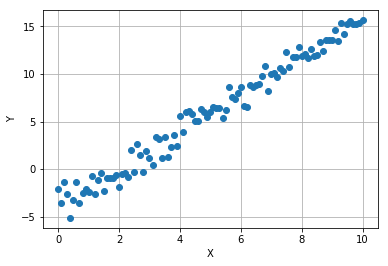

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axis = plt.subplots()
x, y = load_data()
axis.plot(x,y, linestyle="", marker="o")
axis.grid("on")
axis.set_ylabel("Y")
axis.set_xlabel("X");

What if we do a hundred of these runs. We can simulate many runs, as some have called "hacker statistics". We could do this using bootstrapping, but here we'll just call `load_data()` a generate new data sets. What we're about to do is very analogous to the bootstapping procedure used previously. Under-the-hood, `load_data()` is called `numpy.random.gauss()` everytime.

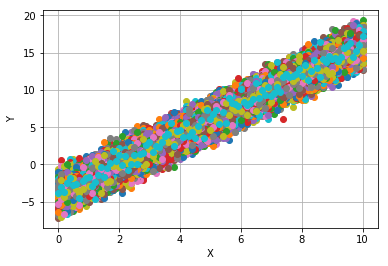

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axis = plt.subplots()
for n in range(0,1000):
    x, y = load_data()
    axis.plot(x,y, linestyle="", marker="o")
axis.grid("on")
axis.set_ylabel("Y")
axis.set_xlabel("X");

Let's look at a single value of $x$... that is, what is $y$ conditioned on $x$?

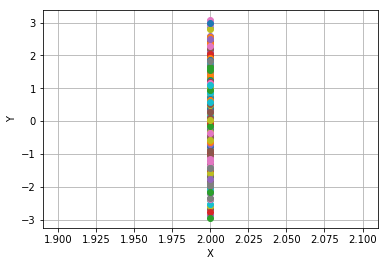

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axis = plt.subplots()
for n in range(0,1000):
    x, y = load_data()
    axis.plot(x[20],y[20], linestyle="", marker="o")
axis.grid("on")
axis.set_ylabel("Y")
axis.set_xlabel("X");

And let's use a histogram to visualize that vertical $y$ distribution...

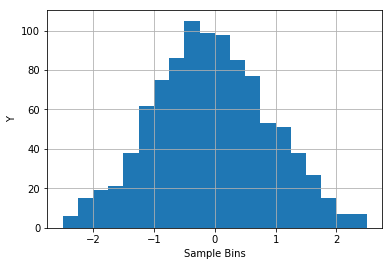

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

y_samples = []
for n in range(0,1000):
    x, y = load_data()
    y_samples.append(y[20])

fig, axis = plt.subplots()
plt.hist(y_samples, bins=numpy.linspace(-2.5,+2.5, 21))
axis.grid("on")
axis.set_ylabel("Y")
axis.set_xlabel("Sample Bins");

Or if you prefer to avoid all the binning problems associated with histograms, let's use a CDF instead...

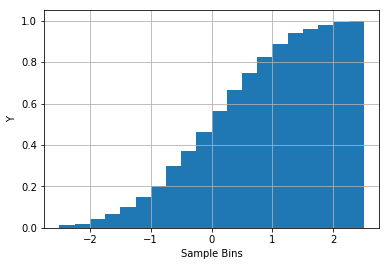

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

y_samples = []
for n in range(0,1000):
    x, y = load_data()
    y_samples.append(y[20])

fig, axis = plt.subplots()
plt.hist(y_samples, bins=numpy.linspace(-2.5,+2.5, 21), normed=True, cumulative=True)
axis.grid("on")
axis.set_ylabel("Y")
axis.set_xlabel("Sample Bins");

This is roughly the underlying distribution of $y_n$ conditioned on $x_n$.

This mean value $y_n$ is the "estimator" of that distribution, in the sense that we can use it to reconstruct a specific gaussian curve. But how do we do that? Well we have to get the variance from somewhere -- you cannot build a gaussian without knowing both mean and variance ($\mu$,$\sigma$) -- so we take a leap and **ASSUME** that every single distribution hiding at each of the many values of $x_n$, that they all have the **SAME VARIANCE**. How does that help? Well then we can treat the variance of $y$ values as seen across **MANY** locations $x$ as being identical to the variance of the underlying distribution at a **SINGLE** location $x_n$. So then now we have the *mean* and the *variance* at for each distribution at each $x_n$, and thus we can construct the guassian at that point.

If the distribution of the residuals is gaussian, and every distribution, one at each point $x_n$ is also gaussian, and they all have the same **variance** (spread), then it turns out that Least Squares is the condition that gives you the best fit possible. ***THAT*** is why we see Least Squares used so often. It's very often the best you can do! These assumptions are often unknowingly and unconsciously made. While they often happen to be true, when they are not, using OLS would NOT result the optimal fit!

## Linear Regression seems more complex than just turning the crank on OLS. Why bother?

Thinking about the problem as an estimation makes it easier to answer questions such as how much of the trend in a scattering of data is the actual linear line and how much is random variation characterized by those "vertical" distributions in y?

Talk about measures of how good the estimation/fit turned out. Talk about correlation coefficient.

The **correlation coefficient** gives the fraction that is due to the trend, and the rest is due to "randomness" of the distribution in y values at a given x.

Plot the residuals to check whether the assumptions that went into the modeling are correct. The residuals should be normally distrinbuted with constant variance.

# Computational Solutions versus Analytic Solutions

For a simple model like $f(a_0, a_1, x) = a_0 + a_1x$, we can find an analytic solution for $a_0, a_1$ that minimizes some measure of error, for how well the model fits the data, and we can do this without a computer, using a simple bit of calculus and some algebra.

But for more complex models, an analytic solution is often impossible. The formula cannot be found.  In these cases a solution can only be found using ***computational methods***. These computational methods are implemented in python libraries such as **`scipy`**, **`statsmodels`**, and **`scikit-learn`**.

# Top Ten Ways to do a Linear Regression

1. `numpy`, using the analytic formula
2. `numpy.polyfit`, using `deg=1`
3. `numpy.linalg`, using `lstsq()` method 
4. `scipy.stats`, using the `linregress()` method
5. `scipy.optimize`, using the `curve_fit()` method
6. `statsmodels.api`, using `OLS()` method
7. `statsmodels.formula.api`, using formula string API with `pandas.DataFrame()`
8. `sklearn.linear_model`, using the `LinearRegression` class.
9. `tensorflow`, using `GradientDescentOptimizer`
10. `tensorflow`, using `GradientDescentOptimizer`, train-test-split

## Preparations: Python Environment

In [20]:
# !conda create -n py35 python=3.5 anaconda -y

## Preparations: Loading Data

In [21]:
import random
import numpy

def load_data(num_pts=101, a0=-4, a1=2, mu=0, sigma=1):
    """
    Generate some data, x, y
    Give it a roughly linear trend, but add noise
    """
    x = numpy.linspace(0,10,num_pts)
    e = numpy.array([random.gauss(mu,sigma) for n in range(num_pts)])
    y = a0 + (a1*x) + e
    return x,y

In [22]:
x, y = load_data()

In [23]:
x[::10],y[::10]

(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 array([ -4.3870571 ,  -1.42603247,   0.53779859,   0.38148402,
          3.52839692,   6.39693087,   9.11482369,   9.8382115 ,
         12.28438298,  14.57885957,  16.1564738 ]))

## Preparations: Visualizing Data

Always visualize your data and you model. Why? Reasons: https://en.wikipedia.org/wiki/Anscombe%27s_quartet

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_data(X_data, Y_data):
    fig, axis = plt.subplots(figsize=(16,4))
    axis.plot(X_data, Y_data,  label="data",  color="black", linestyle="",  marker="o")
    axis.set_ylabel("Y Data")
    axis.set_xlabel("X Data")
    axis.grid("on")
    return fig, axis

def plot_data_model(X, Y_data, Y_model):
    fig, axis = plt.subplots(figsize=(16,4))
    axis.plot(X, Y_data,  label="data",  color="black", linestyle="",  marker="o")
    axis.plot(X, Y_model, label="model", color="red",   linestyle="-", marker="")
    axis.legend()
    axis.grid("on")
    return fig, axis

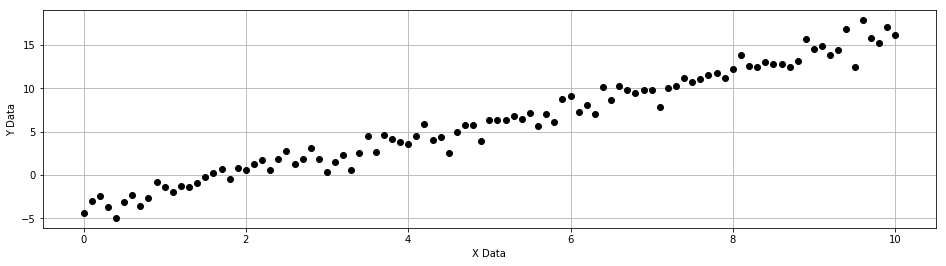

In [25]:
fig, axis = plot_data(x,y);

# Linear Regression with analytic solution

In the simple case of ("Ordinary" or "Linear") Least-Squares fitting, minimizing the vertical distances can be done analytically. So solving the optimization problem can be done analytically. For more complex models, there may be no analytic solution, and the only approach possible is numeric.

Let's encapsulate the analytic solution in a function, and follow a procedure that will look familiar with more complex tools and models latter when only computational methods will work.

In [26]:
def model(x,y):
    X_bar = numpy.sum(x)/len(x)
    Y_bar = numpy.sum(y)/len(y)
    m = numpy.sum( (x - X_bar)*(y - Y_bar) )/numpy.sum( (x - X_bar)**2 )
    b = Y_bar - (m*X_bar)
    return m, b

In [27]:
x, y = load_data()
X_data = x
Y_data = y
slope, intercept = model(X_data, Y_data)
X_model = x
Y_model = slope*x + intercept

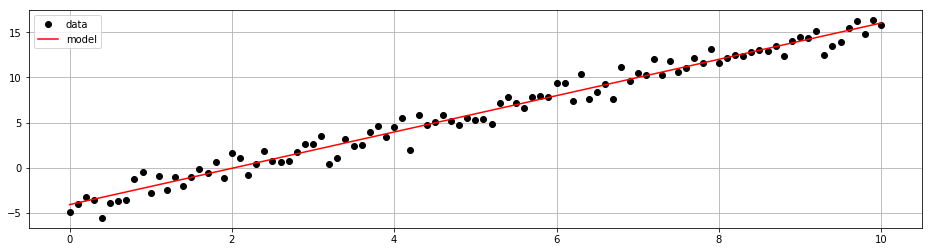

In [28]:
plot_data_model(X_data, Y_data, Y_model);

# Linear Regression with `numpy.polyfit`

In [29]:
import numpy

In [30]:
x, y = load_data()
X_data = x
Y_data = y

In [31]:
a1, a0 = numpy.polyfit(x, y, deg=1)

In [32]:
X_model = X_data
Y_model = a0 + a1*X_model

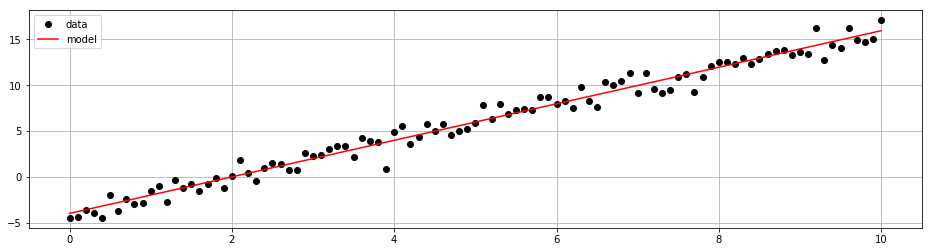

In [33]:
plot_data_model(X_data, Y_data, Y_model);

# Linear Regression with `numpy.linalg`

In [34]:
import numpy

In [35]:
x, y = load_data()
X_data = x
Y_data = y

In [36]:
A_data = numpy.vstack([X_data, numpy.ones(len(X_data))]).T

a1, a0 = numpy.linalg.lstsq(A_data, Y_data)[0]

In [37]:
X_model = X_data
Y_model = a1*X_data + a0

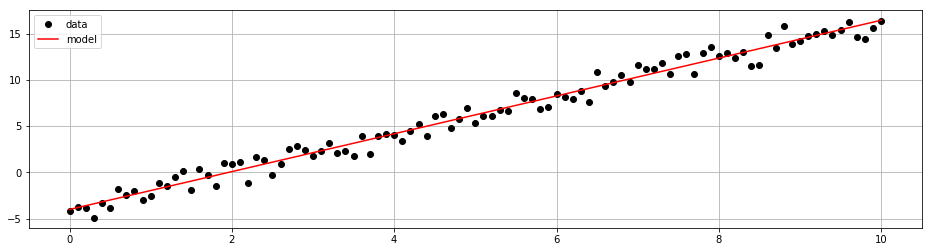

In [38]:
plot_data_model(X_data, Y_data, Y_model);

# Linear Regression with `scipy.stats`

In [39]:
from scipy import stats

In [40]:
x, y = load_data()
X_data = x
Y_data = y

In [41]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X_data, Y_data)
X_model = X_data
Y_model = slope*X_data + intercept

In [42]:
print("slope = {}, intercept = {}".format(slope, intercept))
print("r_value = {}, p_value = {}, std_err = {}".format(r_value, p_value, std_err))

slope = 2.0342515436522692, intercept = -4.120413795658735
r_value = 0.989368511486361, p_value = 1.0242025850516721e-84, std_err = 0.030052709255568823


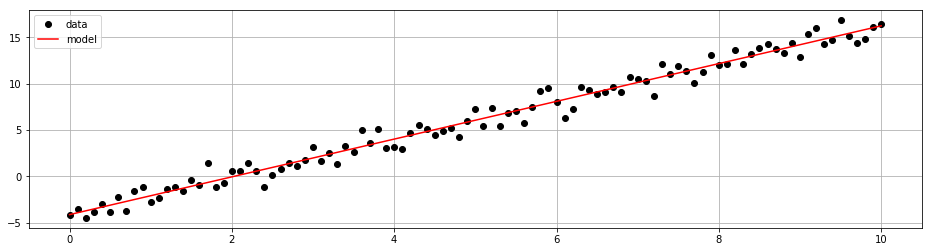

In [43]:
plot_data_model(X_data, Y_data, Y_model);

# Linear Regression with `scipy.optimize`

In [44]:
from scipy import optimize

In [45]:
x, y = load_data()
X_data = x
Y_data = y

In [46]:
def model_func(x, a, b):
    return a + (b*x)

In [47]:
param_opt, param_cov = optimize.curve_fit(model_func, X_data, Y_data)

intercept = param_opt[0]  # think a0 as in a0 + a1*x
slope     = param_opt[1]  # think a1 as in a0 + a1*x
std_err   = numpy.sqrt(numpy.diag(param_cov))

In [48]:
print("slope = {}, intercept = {}".format(slope, intercept))
print("covariance = {}".format(param_cov))
print("std_err = {}".format(std_err))

slope = 1.9871151379396261, intercept = -3.902075063273884
covariance = [[ 0.04245874 -0.00633713]
 [-0.00633713  0.00126743]]
std_err = [ 0.20605518  0.03560091]


In [49]:
Y_model = model_func(X_data, intercept, slope)
X_model = X_data

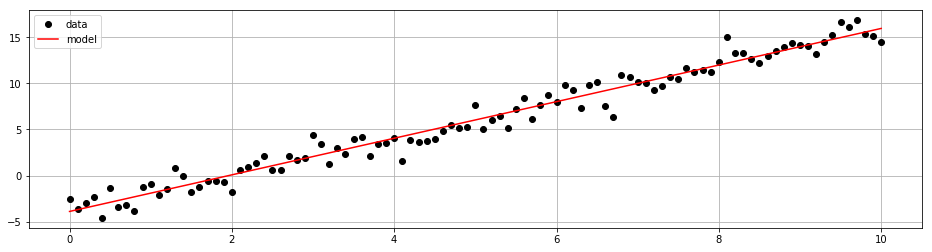

In [50]:
plot_data_model(X_data, Y_data, Y_model);

# Linear Regression with `statsmodels`

For more exmaples, see http://www.statsmodels.org/dev/examples/index.html#regression

In [51]:
import statsmodels.api as sm

/Users/vestuto/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [52]:
# Note: statsmodels cannot handle a pandas DataFrame.index object, so convert to integer days

# df = load_data()
# X_data = (df.index - df.index[0]).days
# Y_data = df[col_name]

In [53]:
x, y = load_data()
X_data = x
Y_data = y

In [54]:
X_const   = sm.add_constant(X_data)
model     = sm.OLS(Y_data,X_const)
model_fit = model.fit()

In [55]:
intercept = model_fit.params[0]
slope     = model_fit.params[1]
print("slope = {}, intercept = {}".format(slope, intercept))

slope = 1.9704424333587185, intercept = -3.843082413048636


In [56]:
X_model = X_data
Y_model = slope*X_data + intercept

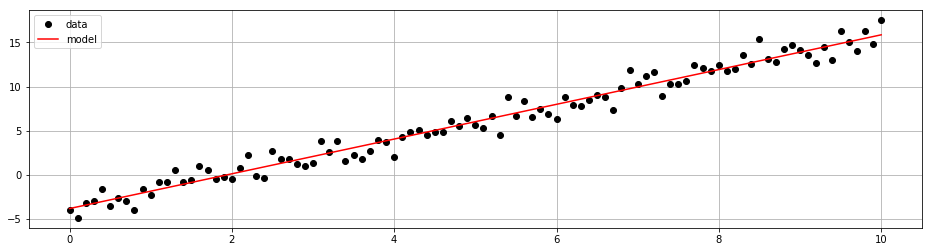

In [57]:
plot_data_model(X_data, Y_data, Y_model);

In [58]:
model_fit.cov_params()

array([[ 0.03887662, -0.00580248],
       [-0.00580248,  0.0011605 ]])

In [59]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     3346.
Date:                Wed, 02 Aug 2017   Prob (F-statistic):           4.02e-78
Time:                        00:13:58   Log-Likelihood:                -142.11
No. Observations:                 101   AIC:                             288.2
Df Residuals:                      99   BIC:                             293.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8431      0.197    -19.491      0.000      -4.234      -3.452
x1             1.9704      0.034     57.842      0.000       1.903       2.038
==============================================================================
Omnibus:                        0.443   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.801   Jarque-Bera (JB):                0.577
Skew:                           0.137   Prob(JB):                        0.749
Kurtosis:                       2.751   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Linear Regression with `statsmodels.formula` and `pandas`

For more exmaples, see http://www.statsmodels.org/dev/examples/index.html#regression

In [60]:
import statsmodels.formula.api as smf
import pandas

In [61]:
x, y = load_data()
X_data = x
Y_data = y
df = pandas.DataFrame(dict(x=X_data, y=Y_data))

In [62]:
model = smf.ols(formula="y ~ x", data=df).fit()

In [63]:
Y_model = model.predict(df)
X_model = X_data

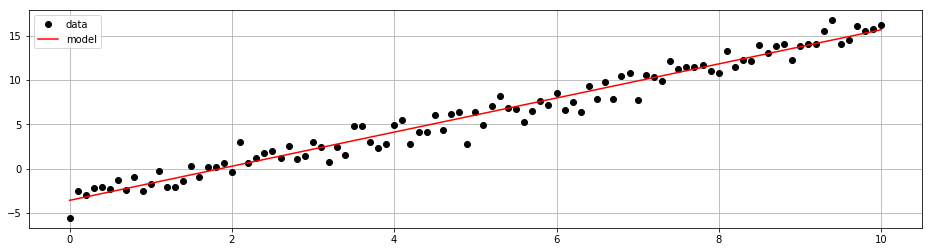

In [64]:
plot_data_model(df.x, Y_data, Y_model);

In [65]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     3023.
Date:                Wed, 02 Aug 2017   Prob (F-statistic):           5.20e-76
Time:                        00:13:59   Log-Likelihood:                -144.88
No. Observations:                 101   AIC:                             293.8
Df Residuals:                      99   BIC:                             299.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.5698      0.203    -17.616      0.000      -3.972      -3.168
x              1.9251      0.035     54.986      0.000       1.856       1.995
==============================================================================
Omnibus:                        2.486   Durbin-Watson:                   2.186
Prob(Omnibus):                  0.289   Jarque-Bera (JB):                2.135
Skew:                          -0.355   Prob(JB):                        0.344
Kurtosis:                       3.059   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Linear Regression with `scikit-learn`

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
x, y = load_data()
X_data = x
Y_data = y

In [68]:
# Practice working with DataFrames and forcing the reshape needed for sklearn
df = pandas.DataFrame(dict(x=X_data, y=Y_data))
X_data = df.x.values.reshape(len(df.y),1)
Y_data = df.y.values.reshape(len(df.y),1)

In [69]:
model = LinearRegression(fit_intercept=True)
model.fit(X_data, Y_data)
Y_model = model.predict(X_data)

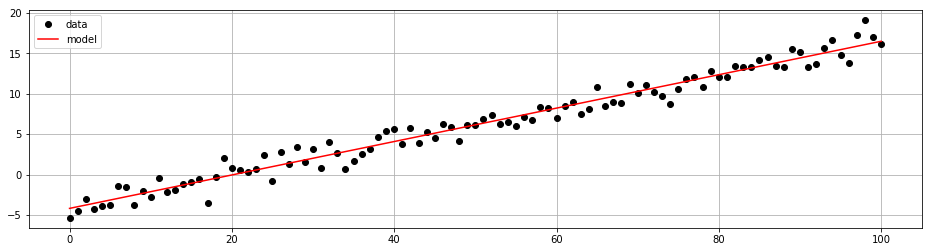

In [70]:
plot_data_model(df.index, Y_data, Y_model);

In [71]:
model.coef_

array([[ 2.06653715]])

In [72]:
model.intercept_

array([-4.18705759])

# Linear Regression with Tensor Flow, gradient descent

Thanks to a friend at TACC: https://github.com/jchuahtacc/MachineLearningRegression

In [73]:
# !conda install tensorflow -y

In [74]:
import tensorflow as tf

In [75]:
# Initial guesses for values of fit parameters
W = tf.Variable([+0.25])
b = tf.Variable([-0.25])

# Prealocate memory for regression solution
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

In [76]:
model = W*x + b
loss = tf.reduce_sum(tf.square(model - y))

In [77]:
optimizer = tf.train.GradientDescentOptimizer(0.0001).minimize(loss)

In [78]:
import numpy as np
import time

cheat_W = 2
cheat_b = -4

starting_value = 2
ending_value = 8
num_values = 100

def make_vals(starting_value, ending_value, num_values):
    # Let's make a bunch of x values
    x_vals = np.linspace(starting_value, ending_value, num_values)
    # Let's make a bunch of y values close to our equation, but randomly off by a small amount
    noise = np.random.uniform(-1, 1, num_values)
    target_loss = np.sum(np.square(noise))
    y_vals = cheat_W * x_vals + cheat_b + noise
    return x_vals, y_vals, abs(target_loss)

x_vals, y_vals, actual_loss = make_vals(starting_value, ending_value, num_values)

# Let's cheat again, and use numpy's built in linear regression
start = time.time()
actual_W, actual_b = np.linalg.lstsq(np.vstack([x_vals, np.ones(len(x_vals))]).T, y_vals)[0]
print("Cheating time:", time.time() - start) 

print("Actual loss:", actual_loss) 
print("Actual W:", actual_W) 
print("Actual b:", actual_b) 

Cheating time: 0.0007448196411132812
Actual loss: 32.4669212677
Actual W: 2.00021650246
Actual b: -3.92817037572


In [79]:
# Try changing the steps
steps = 4000

losses = steps * [ 0.0 ]
Ws = steps * [ 0.0 ]
bs = steps * [ 0.0 ]


def measure_time(algorithm, steps):
    start = time.time()
    algorithm(steps)
    return time.time() - start


def gradient_regression(epochs):
    from random import shuffle
    
    # import all our global variables and data
    global losses
    global Ws
    global bs
    global x_vals
    global y_vals
    
    # machine learning works better with random ordering
    coords = list( zip( x_vals, y_vals) )
    shuffle(coords)
    x_list, y_list = zip(*coords)
    
    # Start a tensorflow session
    session = tf.Session()
    session.run(tf.global_variables_initializer())
    
    # Create a data set to fit
    data = { x : x_list, y: y_list }
    
    # Run a bunch of epochs
    for i in range(epochs):
        # Run one generation and capture a snapshot of it
        _, output_loss, output_W, output_b = session.run([optimizer, loss, W, b], feed_dict=data)
        losses[i] = output_loss
        Ws[i] = output_W[0]
        bs[i] = output_b[0]


execution_time = measure_time(gradient_regression, steps)

print("Execution time:", execution_time) 
print("Actual regression: y = ", actual_W, " * x +", actual_b) 
print("Actual loss: ", actual_loss) 
print("Final regression: y =", Ws[steps - 1], " * x +", bs[steps - 1]) 
print("Final loss:", losses[steps - 1]) 

Execution time: 3.32088303565979
Actual regression: y =  2.00021650246  * x + -3.92817037572
Actual loss:  32.4669212677
Final regression: y = 2.00007  * x + -3.92735
Final loss: 31.9353


# Linear Regression with TensorFlow, machine learning

https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/2_BasicModels/linear_regression.py

Epoch: 0050 cost= 0.236692011 W= 0.473001 b= -0.805708
Epoch: 0100 cost= 0.218242049 W= 0.459714 b= -0.710123
Epoch: 0150 cost= 0.201922178 W= 0.447217 b= -0.62022
Epoch: 0200 cost= 0.187487185 W= 0.435463 b= -0.535666
Epoch: 0250 cost= 0.174719021 W= 0.424409 b= -0.456141
Epoch: 0300 cost= 0.163425401 W= 0.414012 b= -0.381345
Epoch: 0350 cost= 0.153436050 W= 0.404233 b= -0.310998
Epoch: 0400 cost= 0.144600481 W= 0.395036 b= -0.244834
Epoch: 0450 cost= 0.136785313 W= 0.386386 b= -0.182606
Epoch: 0500 cost= 0.129872859 W= 0.37825 b= -0.124078
Epoch: 0550 cost= 0.123758875 W= 0.370598 b= -0.0690316
Epoch: 0600 cost= 0.118351176 W= 0.363401 b= -0.017259
Epoch: 0650 cost= 0.113568179 W= 0.356633 b= 0.0314345
Epoch: 0700 cost= 0.109337769 W= 0.350267 b= 0.077232
Epoch: 0750 cost= 0.105596103 W= 0.344279 b= 0.120306
Epoch: 0800 cost= 0.102286808 W= 0.338648 b= 0.160818
Epoch: 0850 cost= 0.099359907 W= 0.333351 b= 0.19892
Epoch: 0900 cost= 0.096771218 W= 0.32837 b= 0.234756
Epoch: 0950 cost= 

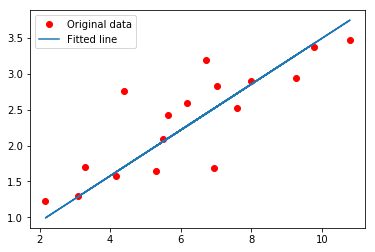

Testing... (Mean square loss Comparison)
Testing cost= 0.0825115
Absolute mean square loss difference: 0.00994536


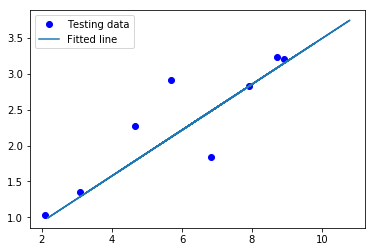

In [80]:
from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

# Appendix: Notes on how others explain a few concepts....

do NOT quote directly... use notes to help organize thoughts!

https://en.wikipedia.org/wiki/Linear_regression

> Linear regression models are often fitted using the least squares approach, but they may also be fitted in other ways, such as by minimizing the "lack of fit" in some other norm (as with least absolute deviations regression), or by minimizing a penalized version of the least squares loss function as in ridge regression (L2-norm penalty) and lasso (L1-norm penalty). Conversely, the least squares approach can be used to fit models that are not linear models. Thus, although the terms "least squares" and "linear model" are closely linked, they are not synonymous. -- 

> Linear Regression and Least Squares are not the same thing. Least Squares is a method for performing Linear Regression. Fiting a line to the data is one thing. Using the strategy of minimization of the square of the vertical difference is what makes it "least squares". An alternative method called "least absolute deviations" uses a similar approach, but minimizes the sum of the squares of the 2D distance, not the vertical distance as in "least squares".

https://www.quora.com/What-is-the-difference-between-linear-regression-and-least-squares


> linear regression is a statistical inference problem. The "y values" take on the interpretation of data you wish to model, and the "x values" take on the interpretation of extra information you have about each data point that might be helpful in predicting their "y values". You are trying to build a probabilistic model that describes "y" while taking into account "x", and a linear model is one of many ways to do this. 

> A linear model assumes that "y" has a different mean for each possible value of "x", and that these means happen to follow a straight line with a certain intercept and a certain slope. As with any statistical inference problem, you estimate the unknown parameters using maximum likelihood estimation. But since in this case the unknown parameters are an intercept and a slope, the end result of maximum likelihood estimation is basically that you are choosing a straight line that fits the observed data best, so this essentially becomes the curve fitting problem discussed above. 

> Now we arrive at the question of why least squares, of all possible curve fitting methods, is so commonly used. 

> The reason is that when solving the statistical linear regression problem, a very common modeling assumption is that for every possible value of "x", the quantity "y" is normally distributed with a mean that is linear in "x". Therefore, the likelihood function is essentially a product of PDFs of the normal distribution. As stated above, you estimate the unknown parameters (and therefore find the best fitting line) by maximizing the likelihood function. If you look at what the product of normal PDFs looks like, you will notice that maximizing this expression happens to be equivalent to... you guessed it... minimizing the sum of squared errors. 

> That is, the line you get performing curve fitting via least squares is equivalent to the line you get performing linear regression using a normal model.

> Under the additional assumption that the [fit] errors are normally distributed, OLS is the maximum likelihood estimator.

> Linear regression is a type of model, which is a set of joint distributions satisfying a set of assumptions.

> Least squares is an estimation technique that allows you to estimate the parameters of models. OLS (ordinary least squares) is the least squares technique used for estimating the parameters of linear regression models.

> The regression line (curve) consists of the expected values of a variable (Y) when given the values of an explanatory variable (X). In other words it is defined as E[Y|X = x]. To actually compute this line we need to know the joint distribution of X and Y, which in many cases we don’t know.

> OLS refers to fitting a line to data and RSS is the cost function that OLS uses

The *"linear"* in "Linear Regression" refers to the linearity of the parameters $a_0$ and $a_1$ in the model $f(a_0, a_1, x_n)$. The word "linear" does ***NOT*** refer to the linearity of $x_n$ in $f(a_0, a_1, x_n)$. The model $f$ can be non-linear in $x_n$, but if it is still linear in the parameters, the method is still called "linear regression. You could use $f(a_0, a_1, x) = a_0 + a_1x + a_2x^2$ as the model family and then minimize the same sum to solve for specific values of $a_0, a_1, a_2$